In [51]:
import pandas as pd
import os

data201810 = pd.read_excel("201810_totData.xlsx")
data201811 = pd.read_excel("201811_totData.xlsx")
data201812 = pd.read_excel("201812_totData.xlsx")
data201901 = pd.read_excel("201901_totData.xlsx")
data201902 = pd.read_excel("201902_totData.xlsx")

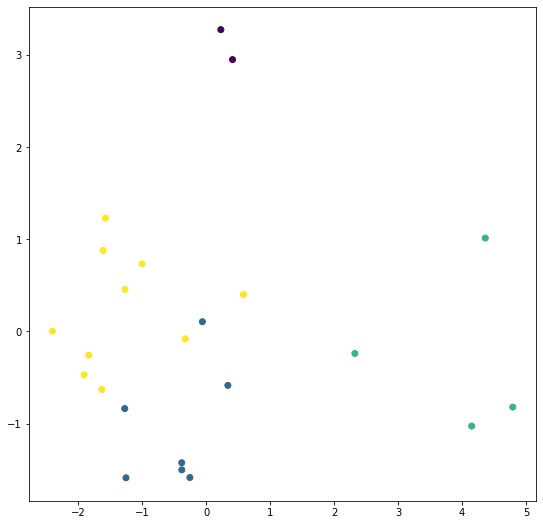

,지역,풍량,온도,거주인구,근무인구,방문인구,사업체수,학교수,숙박업수,군집
0,강정동,169.032258,18.069355,15783.340502,1635.290323,11029.750896,1758,1,102,0
1,건입동,135.009677,24.361290,8160.263441,1124.535842,8249.243728,767,2,29,3
2,구좌읍,195.067742,23.727419,14544.652330,1900.743728,9967.750896,1561,12,10,1
3,남원읍,147.774194,23.904167,14563.354839,1162.908602,9443.813620,1070,9,6,1
4,대정읍,199.858065,23.745161,20171.675627,1267.440860,8018.363799,1655,12,14,1
5,중문동,166.016129,23.386667,9636.908602,962.960573,6745.516129,721,5,4,3
6,서귀동,192.545161,20.775806,7478.523297,1621.340502,15784.365591,1758,3,147,0
7,성산읍,192.545161,20.775806,15177.551971,1261.939068,11603.808244,1484,10,26,1
8,아라동,192.545161,20.775806,47233.016129,8650.982079,17883.464158,1909,5,0,2
9,외도일동,135.009677,24.361290,12760.275986,767.817204,6144.840502,1329,0,27,3


In [44]:
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

#Scaling
standard_scaler = StandardScaler()
# robust_scaler = RobustScaler()
# minmax_scaler = MinMaxScaler()
# maxabs_scaler = MaxAbsScaler()

data_std_scaled = standard_scaler.fit_transform(data201810.loc[:,"풍량":"숙박업수"])
# data_rbt_scaled = robust_scaler.fit_transform(data201810.loc[:,"풍량":"방문인구"])
# data_mm_scaled = minmax_scaler.fit_transform(data201810.loc[:,"풍량":"방문인구"])
# data_ma_scaled = maxabs_scaler.fit_transform(data201810.loc[:,"풍량":"방문인구"])


# K-means
std_km5 = cluster.KMeans(n_clusters=4, random_state=42).fit(data_std_scaled)
rbt_km5 = cluster.KMeans(n_clusters=4, random_state=42).fit(data_rbt_scaled)
mm_km5 = cluster.KMeans(n_clusters=4, random_state=42).fit(data_mm_scaled)
ma_km5 = cluster.KMeans(n_clusters=4, random_state=42).fit(data_ma_scaled)


# PCA for visualization
pca = PCA(n_components=2)

pca.fit(data_std_scaled)
pca_std = pca.transform(data_std_scaled)
# pca.fit(data_rbt_scaled)
# pca_rbt = pca.transform(data_rbt_scaled)
# pca.fit(data_mm_scaled)
# pca_mm = pca.transform(data_mm_scaled)
# pca.fit(data_ma_scaled)
# pca_ma = pca.transform(data_ma_scaled)

plt.figure(figsize=(20,20))

plt.subplot(221)
plt.scatter(pca_std[:,0], pca_std[:,1], c=std_km5.labels_)

# plt.subplot(222)
# plt.scatter(pca_rbt[:,0], pca_rbt[:,1], c=rbt_km5.labels_)

# plt.subplot(223)
# plt.scatter(pca_mm[:,0], pca_mm[:,1], c=std_km5.labels_)

# plt.subplot(224)
# plt.scatter(pca_ma[:,0], pca_ma[:,1], c=std_km5.labels_)


plt.show()

data201810["군집"] = std_km5.labels_
data201810



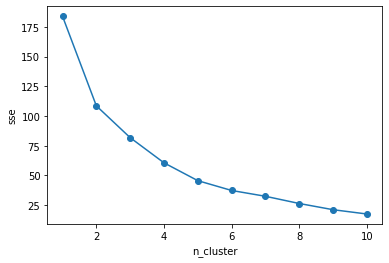

In [45]:
# 엘보우 기법
sse = []
for i in range(1,11):
    km = cluster.KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(data_std_scaled)
    sse.append(km.inertia_)
    
plt.plot(range(1,11), sse, marker='o')
plt.xlabel("n_cluster")
plt.ylabel('sse')
plt.show()

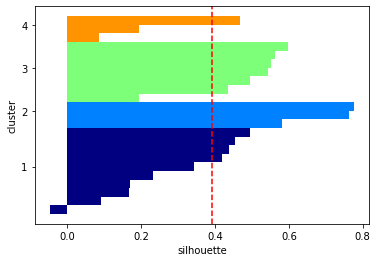

In [46]:
# 실루엣 기법
from sklearn.metrics import silhouette_samples
from matplotlib import cm

# 데이터 X와 X를 임의의 클러스터 개수로 계산한 kmeans 결과인 y를 인자로 받아
# 각 클러스터에 속하는 개별 데이터의 실루엣 계수값을 수평 막대그래프로 그려주는 함수.
def plotSilhouette(X, y):
    cluster_labels = np.unique(y) # y의 고유값을 멤버로하는 배열
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y, metric='euclidean') #실루엣 계수 계산 결과 받
    y_ax_lower, y_ax_upper = 0,0
    yticks = []
    
    for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color='red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('cluster')
    plt.xlabel('silhouette')
    plt.show()


data201811 = pd.read_excel("201811_totData.xlsx")# 
X = data201811.loc[:,"풍량":"숙박업수"]
y = std_km5.fit_predict(X)
plotSilhouette(X,y)

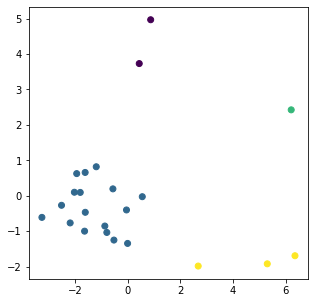

,지역,풍량,온도,거주인구,근무인구,방문인구,사업체수,학교수,숙박업수,군집
0,강정동,169.032258,18.069355,15783.340502,1635.290323,11029.750896,1758,1,102,2
1,건입동,135.009677,24.361290,8160.263441,1124.535842,8249.243728,767,2,29,0
2,구좌읍,195.067742,23.727419,14544.652330,1900.743728,9967.750896,1561,12,10,2
3,남원읍,147.774194,23.904167,14563.354839,1162.908602,9443.813620,1070,9,6,2
4,대정읍,199.858065,23.745161,20171.675627,1267.440860,8018.363799,1655,12,14,2
5,중문동,166.016129,23.386667,9636.908602,962.960573,6745.516129,721,5,4,0
6,서귀동,192.545161,20.775806,7478.523297,1621.340502,15784.365591,1758,3,147,0
7,성산읍,192.545161,20.775806,15177.551971,1261.939068,11603.808244,1484,10,26,2
8,아라동,192.545161,20.775806,47233.016129,8650.982079,17883.464158,1909,5,0,3
9,외도일동,135.009677,24.361290,12760.275986,767.817204,6144.840502,1329,0,27,0


In [50]:
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

#Scaling
robust_scaler = RobustScaler()
data_rbt_scaled = robust_scaler.fit_transform(data201810.loc[:,"풍량":"숙박업수"])

# K-means
rbt_km5 = cluster.KMeans(n_clusters=4, random_state=42).fit(data_rbt_scaled)

# PCA for visualization
pca = PCA(n_components=2)
pca.fit(data_rbt_scaled)
pca_rbt = pca.transform(data_rbt_scaled)

plt.figure(figsize=(5,5))
plt.scatter(pca_rbt[:,0], pca_rbt[:,1], c=rbt_km5.labels_)
plt.show()

data201810["군집"] = std_km5.labels_
data201810



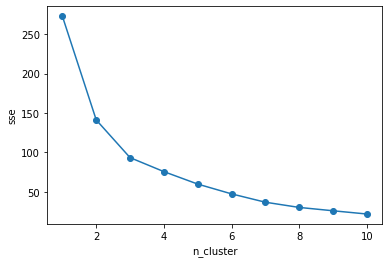

In [52]:
# 엘보우 기법
sse = []
for i in range(1,11):
    km = cluster.KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(data_rbt_scaled)
    sse.append(km.inertia_)
    
plt.plot(range(1,11), sse, marker='o')
plt.xlabel("n_cluster")
plt.ylabel('sse')
plt.show()

In [1]:
# 실루엣 기법
from sklearn.metrics import silhouette_samples
from matplotlib import cm

# 데이터 X와 X를 임의의 클러스터 개수로 계산한 kmeans 결과인 y를 인자로 받아
# 각 클러스터에 속하는 개별 데이터의 실루엣 계수값을 수평 막대그래프로 그려주는 함수.
def plotSilhouette(X, y):
    cluster_labels = np.unique(y) # y의 고유값을 멤버로하는 배열
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y, metric='euclidean') #실루엣 계수 계산 결과 받
    y_ax_lower, y_ax_upper = 0,0
    yticks = []
    
    for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color='red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('cluster')
    plt.xlabel('silhouette')
    plt.show()


X = data201812.loc[:,"풍량":"숙박업수"]
y = rbt_km5.fit_predict(X)
plotSilhouette(X,y)

NameError: name 'data201812' is not defined

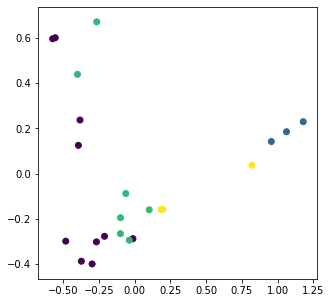

,지역,풍량,온도,거주인구,근무인구,방문인구,사업체수,학교수,숙박업수,군집
0,강정동,169.032258,18.069355,15783.340502,1635.290323,11029.750896,1758,1,102,0
1,건입동,135.009677,24.361290,8160.263441,1124.535842,8249.243728,767,2,29,2
2,구좌읍,195.067742,23.727419,14544.652330,1900.743728,9967.750896,1561,12,10,3
3,남원읍,147.774194,23.904167,14563.354839,1162.908602,9443.813620,1070,9,6,2
4,대정읍,199.858065,23.745161,20171.675627,1267.440860,8018.363799,1655,12,14,3
5,중문동,166.016129,23.386667,9636.908602,962.960573,6745.516129,721,5,4,2
6,서귀동,192.545161,20.775806,7478.523297,1621.340502,15784.365591,1758,3,147,0
7,성산읍,192.545161,20.775806,15177.551971,1261.939068,11603.808244,1484,10,26,0
8,아라동,192.545161,20.775806,47233.016129,8650.982079,17883.464158,1909,5,0,1
9,외도일동,135.009677,24.361290,12760.275986,767.817204,6144.840502,1329,0,27,2


In [55]:
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

minmax_scaler = MinMaxScaler()
data_mm_scaled = minmax_scaler.fit_transform(data201810.loc[:,"풍량":"방문인구"])

# K-means
mm_km5 = cluster.KMeans(n_clusters=4, random_state=42).fit(data_mm_scaled)

# PCA for visualization
pca = PCA(n_components=2)

pca.fit(data_mm_scaled)
pca_mm = pca.transform(data_mm_scaled)

plt.figure(figsize=(5,5))
plt.scatter(pca_mm[:,0], pca_mm[:,1], c=std_km5.labels_)
plt.show()

data201810["군집"] = mm_km5.labels_
data201810

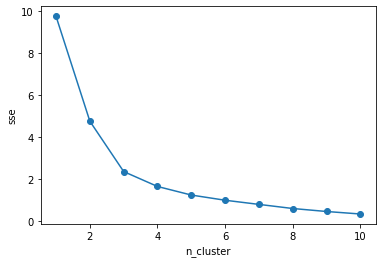

In [56]:
# 엘보우 기법
sse = []
for i in range(1,11):
    km = cluster.KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(data_mm_scaled)
    sse.append(km.inertia_)
    
plt.plot(range(1,11), sse, marker='o')
plt.xlabel("n_cluster")
plt.ylabel('sse')
plt.show()

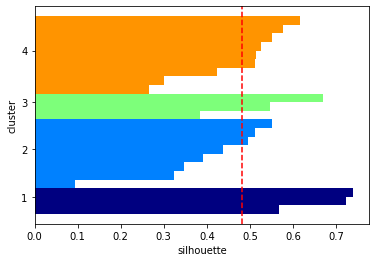

In [57]:
# 실루엣 기법
from sklearn.metrics import silhouette_samples
from matplotlib import cm

# 데이터 X와 X를 임의의 클러스터 개수로 계산한 kmeans 결과인 y를 인자로 받아
# 각 클러스터에 속하는 개별 데이터의 실루엣 계수값을 수평 막대그래프로 그려주는 함수.
def plotSilhouette(X, y):
    cluster_labels = np.unique(y) # y의 고유값을 멤버로하는 배열
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y, metric='euclidean') #실루엣 계수 계산 결과 받
    y_ax_lower, y_ax_upper = 0,0
    yticks = []
    
    for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color='red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('cluster')
    plt.xlabel('silhouette')
    plt.show()


X = data201901.loc[:,"풍량":"숙박업수"]
y = mm_km5.fit_predict(X)
plotSilhouette(X,y)

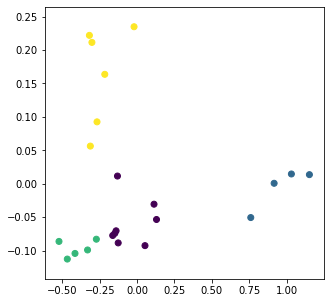

,지역,풍량,온도,거주인구,근무인구,방문인구,사업체수,학교수,숙박업수,군집
0,강정동,169.032258,18.069355,15783.340502,1635.290323,11029.750896,1758,1,102,0
1,건입동,135.009677,24.361290,8160.263441,1124.535842,8249.243728,767,2,29,3
2,구좌읍,195.067742,23.727419,14544.652330,1900.743728,9967.750896,1561,12,10,0
3,남원읍,147.774194,23.904167,14563.354839,1162.908602,9443.813620,1070,9,6,3
4,대정읍,199.858065,23.745161,20171.675627,1267.440860,8018.363799,1655,12,14,0
5,중문동,166.016129,23.386667,9636.908602,962.960573,6745.516129,721,5,4,3
6,서귀동,192.545161,20.775806,7478.523297,1621.340502,15784.365591,1758,3,147,0
7,성산읍,192.545161,20.775806,15177.551971,1261.939068,11603.808244,1484,10,26,0
8,아라동,192.545161,20.775806,47233.016129,8650.982079,17883.464158,1909,5,0,1
9,외도일동,135.009677,24.361290,12760.275986,767.817204,6144.840502,1329,0,27,3


In [58]:
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

#Scaling
maxabs_scaler = MaxAbsScaler()
data_ma_scaled = maxabs_scaler.fit_transform(data201810.loc[:,"풍량":"방문인구"])

# K-means
ma_km5 = cluster.KMeans(n_clusters=4, random_state=42).fit(data_ma_scaled)

# PCA for visualization
pca = PCA(n_components=2)
pca.fit(data_ma_scaled)
pca_ma = pca.transform(data_ma_scaled)

plt.figure(figsize=(5,5))
plt.scatter(pca_ma[:,0], pca_ma[:,1], c=ma_km5.labels_)
plt.show()

data201810["군집"] = ma_km5.labels_
data201810

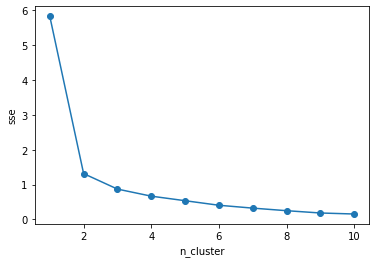

In [59]:
# 엘보우 기법
sse = []
for i in range(1,11):
    km = cluster.KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(data_ma_scaled)
    sse.append(km.inertia_)
    
plt.plot(range(1,11), sse, marker='o')
plt.xlabel("n_cluster")
plt.ylabel('sse')
plt.show()

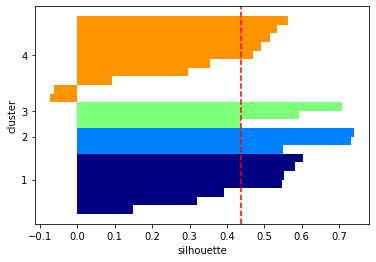

In [60]:
# 실루엣 기법
from sklearn.metrics import silhouette_samples
from matplotlib import cm

# 데이터 X와 X를 임의의 클러스터 개수로 계산한 kmeans 결과인 y를 인자로 받아
# 각 클러스터에 속하는 개별 데이터의 실루엣 계수값을 수평 막대그래프로 그려주는 함수.
def plotSilhouette(X, y):
    cluster_labels = np.unique(y) # y의 고유값을 멤버로하는 배열
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y, metric='euclidean') #실루엣 계수 계산 결과 받
    y_ax_lower, y_ax_upper = 0,0
    yticks = []
    
    for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color='red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('cluster')
    plt.xlabel('silhouette')
    plt.show()


X = data201902.loc[:,"풍량":"숙박업수"]
y = ma_km5.fit_predict(X)
plotSilhouette(X,y)

In [ ]:
# 덴드로그램

from scipy.cluster.hierarchy import dendrogram, ward

# 데이터 배열 X에 ward함수를 적용
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된 거리 정보가 담긴 배열을 반환한다.
linkage_array = ward(X)

# 클러스터 간의거리 정보가 담긴 linkage_array를 사용해 덴드로 그램을 그린다.
dendrogram(linkage_array)

# 두개와 세개의 클러스터를 구분하느 커트라인
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, '2 cluster', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, '3 cluster', va='center', fontdict={'size':15})

plt.xlabel("sample num")
plt.ylabel("cluster dist")
plt.show()